In [93]:
import os
import csv
import numpy as np
import os.path as osp

import matplotlib
# enable LaTeX style fonts
matplotlib.rc('text', usetex=True)

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import glob

In [94]:
csvfiles = os.listdir('csv')
csvfiles

['run_trainval_fcn8s_lr1e-04_wd5e-04_bs40_ep80_seed2-tag-Loss_val.csv',
 'run_trainval_fcn8s_lr1e-03_wd5e-04_bs40_ep80_seed2-tag-Loss_train.csv',
 'run_trainval_fcn16slim_lr1e-04_wd5e-04_bs40_ep80_seed1-tag-Loss_val.csv',
 'run_trainval_fcn8s_lr1e-04_wd5e-04_bs40_ep80_seed2-tag-Loss_train.csv',
 'run_trainval_fcn8slim_lr1e-04_wd5e-04_bs40_ep80_seed1-tag-Loss_val.csv',
 'run_trainval_fcn8s_lr1e-03_wd5e-04_bs40_ep80_seed2-tag-Loss_val.csv']

In [97]:
train_files = glob.glob('./csv/*fcn8s*train.csv')
train_files

['./csv/run_trainval_fcn8s_lr1e-03_wd5e-04_bs40_ep80_seed2-tag-Loss_train.csv',
 './csv/run_trainval_fcn8s_lr1e-04_wd5e-04_bs40_ep80_seed2-tag-Loss_train.csv']

In [99]:
val_files = glob.glob('./csv/*fcn8s_*val.csv')
val_files

['./csv/run_trainval_fcn8s_lr1e-04_wd5e-04_bs40_ep80_seed2-tag-Loss_val.csv',
 './csv/run_trainval_fcn8s_lr1e-03_wd5e-04_bs40_ep80_seed2-tag-Loss_val.csv']

In [102]:
other_files = glob.glob('./csv/*slim*val.csv')
other_files

['./csv/run_trainval_fcn16slim_lr1e-04_wd5e-04_bs40_ep80_seed1-tag-Loss_val.csv',
 './csv/run_trainval_fcn8slim_lr1e-04_wd5e-04_bs40_ep80_seed1-tag-Loss_val.csv']

In [72]:
def csv_to_numpy(csvfile):

    step_and_value = []

    with open(csvfile, newline='') as f:
        spamreader = csv.reader(f, delimiter=',', quotechar='|')
        row = next(spamreader)
        for row in spamreader:
            step_and_value.append((int(row[1]), float(row[2])))
    return np.asarray(step_and_value)

In [103]:
train_1e_3 = csv_to_numpy(train_files[0])
train_1e_4 = csv_to_numpy(train_files[1])

val_1e_3 = csv_to_numpy(val_files[0])
val_1e_4 = csv_to_numpy(val_files[1])

fc16slim_1e_4 = csv_to_numpy(other_files[0])
fc8slim_1e_4 = csv_to_numpy(other_files[1])

In [107]:
other_files[1]

'./csv/run_trainval_fcn8slim_lr1e-04_wd5e-04_bs40_ep80_seed1-tag-Loss_val.csv'

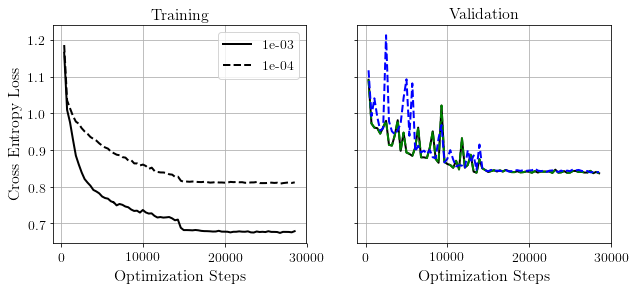

In [110]:
font = 16

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax[0].plot(train_1e_3[:, 0], train_1e_3[:, 1], linewidth=2, label='1e-03', c='k')
ax[0].plot(train_1e_4[:, 0], train_1e_4[:, 1], linewidth=2, label='1e-04', linestyle='--', c='k')
ax[0].set_ylabel('Cross Entropy Loss', fontsize=font)
ax[0].set_xlabel('Optimization Steps', fontsize=font)
ax[0].legend(fontsize=font-2)
ax[0].tick_params(labelsize=font-2)
ax[0].set_title('Training', fontsize=font)
ax[0].grid()

ax[1].plot(val_1e_4[:, 0], val_1e_4[:, 1], linewidth=2, c='k')
#ax[1].plot(val_1e_3[:, 0], val_1e_3[:, 1], linewidth=2, linestyle='--', c='k')
ax[1].plot(fc8slim_1e_4[:, 0], fc8slim_1e_4[:, 1], linewidth=2, linestyle='--', c='g')
ax[1].plot(fc16slim_1e_4[:, 0], fc16slim_1e_4[:, 1], linewidth=2, linestyle='--', c='b')

ax[1].set_xlabel('Optimization Steps', fontsize=font)
ax[1].tick_params(labelsize=font-2)
ax[1].set_title('Validation', fontsize=font)
ax[1].grid()